In [2]:
import numpy as np
import pandas as pd
import datetime as datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
%matplotlib inline

In [12]:
airline = pd.read_csv("airline_passengers.csv",index_col='Month')

In [13]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


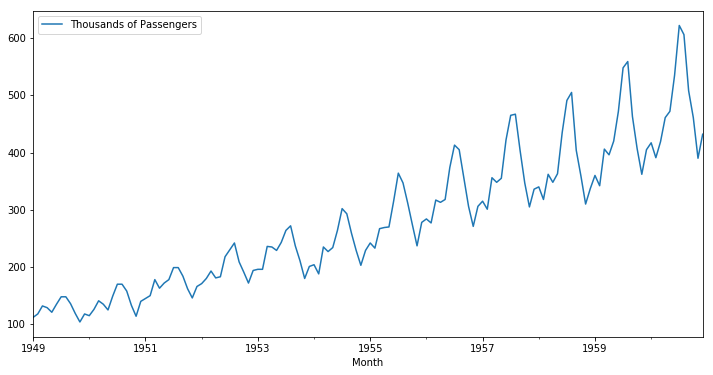

In [17]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.plot(figsize=(12,6));

In [18]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
# Simple Rolling

In [19]:
airline['6-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [20]:
airline['12-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [22]:
airline.tail()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA
Month,,,
1960-08-01,606.0,519.166667,463.333333
1960-09-01,508.0,534.000000,467.083333
1960-10-01,461.0,534.000000,471.583333
1960-11-01,390.0,520.333333,473.916667
1960-12-01,432.0,503.166667,476.166667


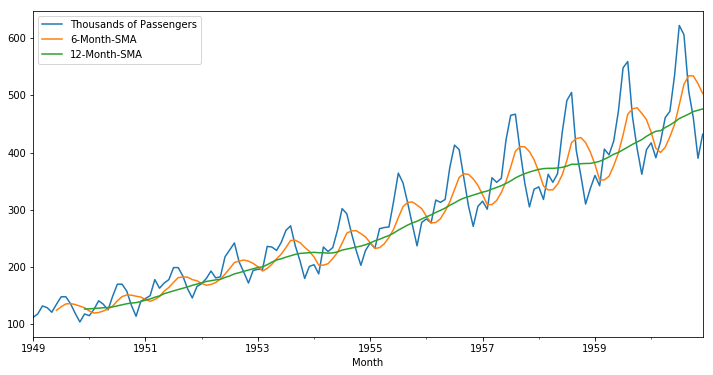

In [24]:
# Simple Rolling: note the lag in the beginning, smaller windows leading to more noise
# also note that it never reaches the peak due to averaging 
# EMWA will give more weight to the end points
airline.plot(figsize=(12,6));

In [25]:
# EWMA
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

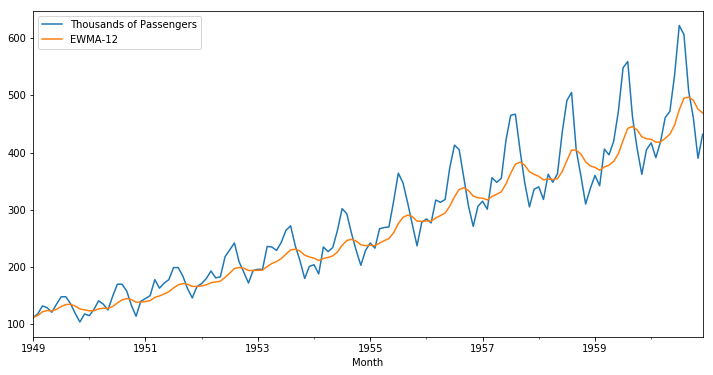

In [26]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(12,6));